Task a is shown below with the dataframe being imported from the csv file given. The stats are then printed after using the built in calculation for mean, median and 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csv_file="volume_pressure_data.csv"
#dataframes are read in from csv file provided
df = pd.read_csv(csv_file)
df.head()
print("First 5 rows:")
print(df.head(5), end="\n")
stats=df[["Volume", "Pressure"]].agg(["mean", "median", "std"])
df[["Volume", "Pressure"]].describe()
print("Statistics:")
print(stats, end="\n")




First 5 rows:
   Volume  Pressure
0      48   29.1250
1      46   30.5625
2      44   31.9375
3      42   33.5000
4      40   35.3125
Statistics:
           Volume   Pressure
mean    27.120000  61.507500
median  24.000000  58.812500
std     11.192706  25.840546


Task B is shown below to visualize the data points on their own with a basic plotting setup.

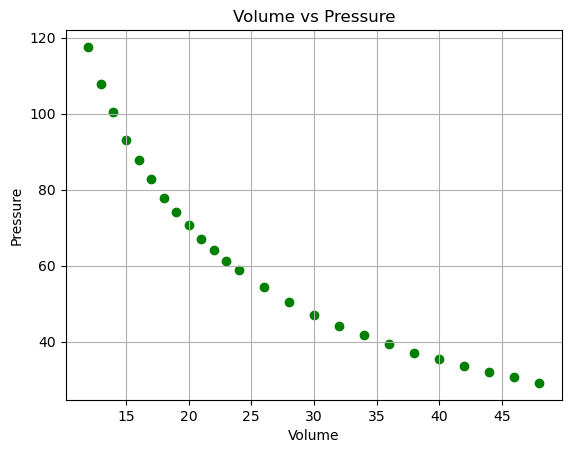

In [5]:

#variables defined for x and y from the imported data
x=df["Volume"].to_numpy()
y=df["Pressure"].to_numpy()
#plotting the labeled graph with points and gridlines
plt.figure()
plt.scatter(x, y, marker='o',color='green', label='scatter plot')
plt.xlabel("Volume")
plt.ylabel("Pressure")
plt.title("Volume vs Pressure")
plt.grid(True)

Parts c, d, and e are included below and involve fitting a quadratic to the given data, 
then storing this data as the predicted data and using this to calculate the root mean square error. Finally, the plot is generated again with the fit and RMSE shown along with the equation.
The Polynomial fit equation comes to .081x^2-6.933x+180.078. This equation doesn't make a lot of sense and only barely captures the curvature in the given interval shown because Boyle's law gives an inverse relationship between Pressure and Volume, where increasing one should increase the inverse of the other. 

RMSE: 3.262


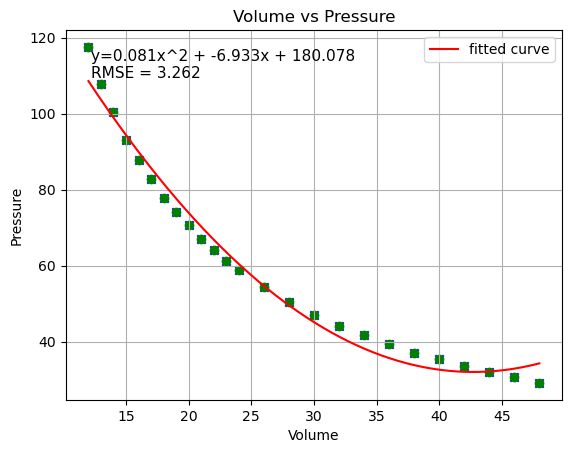

In [6]:
#make a polynomial fit (quadratic)
coeffs=np.polyfit(x,y,2)
a, b, c= coeffs
eqn=f"y={a:.3f}x^2 + {b:.3f}x + {c:.3f}"
p = np.poly1d(coeffs)
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit =np.polyval(coeffs, x_fit)
#plot the fitted curve
fig, ax = plt.subplots()
ax.scatter(x, y, marker='x', color='blue')
ax.plot(x_fit, y_fit, color='red', label='fitted curve')
ax.legend()
y_predfit =p(x)
#use the predicted values of y to calculate the RMSE
rmse = np.sqrt(np.mean((y-y_predfit)**2))
print(f"RMSE: {rmse:.3f}")
#display the equation of the fit along with the RMSE on the graph
ax.text(0.05, 0.95, eqn + "\n"+ f"RMSE = {rmse:.3f}", transform=ax.transAxes, fontsize=11, verticalalignment='top')
plt.scatter(x, y, marker='o',color='green', label="Volume vs Pressure")
plt.xlabel("Volume")
plt.ylabel("Pressure")
plt.title("Volume vs Pressure")
plt.grid(True)
fig
plt.show()